In [49]:
#imported the librarys needed
import pandas as pd
import geopandas as gpd

import plotly.express as px
import plotly.graph_objs as go

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

import numpy as np

import seaborn as sns

In [56]:
df = pd.read_csv('60AMI_clean.csv')
df.head()

,People,Weight,SERIALNO,Bedrooms,Units,Household_Type,PUMA,Year_built,MV,Race,...,Adults,Children,col_students,Young Adults,Working_Age_Adults,Single_Parent_HH,Seniors_Only,Seniors_Exist,Children_Exist,Moved
0,1,11,2.02E+12,0,7,4,2313,1939,3,1,...,1,0,0,0,1,0,0,0,0,0
1,1,23,2.02E+12,0,8,4,2312,1940,1,6,...,1,0,0,1,1,0,0,0,0,1
2,1,6,2.02E+12,0,6,4,2306,1980,2,1,...,1,0,0,1,1,0,0,0,0,1
3,1,62,2.02E+12,0,7,6,2312,2010,1,1,...,1,0,0,0,1,0,0,0,0,1
4,1,11,2.02E+12,0,9,6,2313,1950,1,1,...,1,0,0,0,1,0,0,0,0,1


In [57]:
# list of columns to include in the model
xvars = ['Bedrooms','Units','Household_Type','PUMA','Year_built','MV','Race','Hispanic','MIG',
         'Seniors','Adults','Children','col_students','Young Adults','Working_Age_Adults',
         'Single_Parent_HH','Seniors_Only','Seniors_Exist','Children_Exist','Moved']

# define y variable 
yvar = 'cost_burden'

# create a dataframe with no NaNs
df_to_fit = df[xvars+[yvar]].dropna()

In [58]:
df_to_fit.sample(6)

,Bedrooms,Units,Household_Type,PUMA,Year_built,MV,Race,Hispanic,MIG,Seniors,...,Children,col_students,Young Adults,Working_Age_Adults,Single_Parent_HH,Seniors_Only,Seniors_Exist,Children_Exist,Moved,cost_burden
663,1,5,6,2307,1980,7,1,1,1,1,...,0,0,0,0,0,1,1,0,0,0
2646,2,6,6,2314,1939,1,2,1,3,1,...,0,0,0,0,0,1,1,0,1,1
4890,3,2,6,2305,1950,6,1,1,1,1,...,0,0,0,0,0,1,1,0,0,1
5791,3,2,1,2319,2000,5,1,1,1,1,...,0,0,0,1,0,0,1,0,0,1
5285,3,2,2,2306,1980,6,1,2,1,0,...,0,0,1,2,0,0,0,0,0,1
2815,2,8,6,2305,1960,1,2,1,3,1,...,0,0,0,0,0,1,1,0,1,0


In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    df_to_fit[xvars], df_to_fit[yvar], test_size = 0.25, random_state = 1)

# check we have a reasonable split
print(len(X_train), len(y_train) )
print(len(X_test), len(y_test) )

5628 5628
1876 1876


In [60]:
# initialize the random forest classifer object
rf = RandomForestClassifier(n_estimators = 100, random_state = 1)

# now fit the model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [62]:
y_pred = rf.predict(X_test)
y_pred

array([0.82 , 0.3  , 0.56 , ..., 0.622, 0.86 , 0.9  ])

In [63]:
#checked the models performance 
print('Predicted fraction True: {:.4f}. Actual fraction True: {:.4f}'.format(
    y_pred.mean(), y_test.mean()))

Predicted fraction True: 0.7008. Actual fraction True: 0.7225


Text(0, 0.5, 'Mean decrease in impurity')

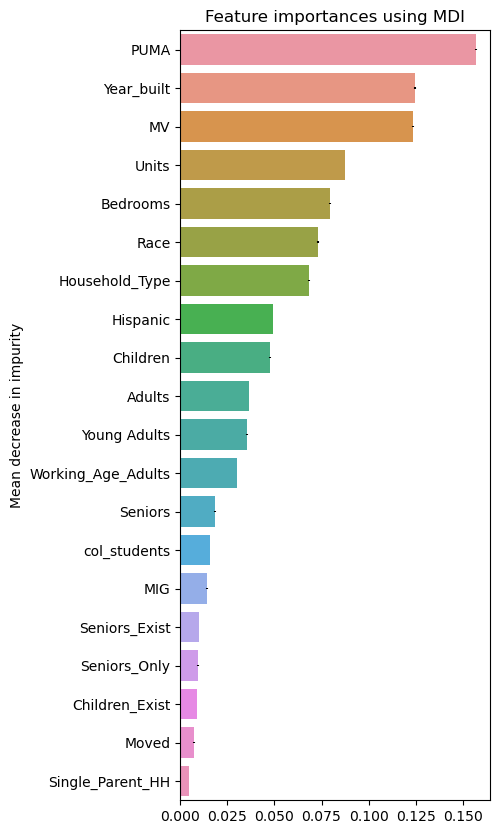

In [64]:
#plotted feature importances 
importances = rf.feature_importances_

# convert to a series, and give the index labels from our X_train dataframe
forest_importances = pd.Series(importances, index=X_train.columns)

# get the standard deviations to be able to plot the error bars
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

# sort the importances in descending order
forest_importances.sort_values(inplace=True, ascending=False)

# plot just the top 10

fig, ax = plt.subplots(figsize=(4,10))
sns.barplot(x=forest_importances.values[:25], y=forest_importances.index[:25], yerr=std[:25], ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

In [99]:
# Charted the most important features (as identified by the model)

In [100]:
df2 = pd.read_csv('60AMI.csv')

In [101]:
df2.head()

,NP,WGTP,SERIALNO,TEN,HINCP,BDSP,GRNTP,BLD,HHT,SMOCP,...,Young Adults,Working_Age_Adults,Single_Parent_HH,Seniors_Only,Seniors_Exist,Children_Exist,typology,Moved,AMI_standard,below_60_AMI
0,1,11,2.017E+12,3,25000,0,420.0,7,4,NaN,...,0,1,0,0,0,0,10-49 Units,0,36240,True
1,1,23,2.017E+12,3,16500,0,650.0,8,4,NaN,...,1,1,0,0,0,0,10-49 Units,1,36240,True
2,1,6,2.017E+12,3,23900,0,900.0,6,4,NaN,...,1,1,0,0,0,0,2-9 Units,1,36240,True
3,1,62,2.017E+12,3,10000,0,722.0,7,6,NaN,...,0,1,0,0,0,0,10-49 Units,1,36240,True
4,1,11,2.017E+12,3,20000,0,852.0,9,6,NaN,...,0,1,0,0,0,0,50+ Units,1,36240,True


In [102]:
#renamed / cleaned varables to display
df2['cost_burden'] = df2['cost_burden'].replace({0:'Less than 30%'})
df2['cost_burden'] = df2['cost_burden'].replace({1:'Greater than 30%'})
df2.rename(columns={'cost_burden': 'Share of income spent on housing costs', 'WGTP':'Number of Households', 'RACE':'Race/Ethnicity'}, inplace=True)

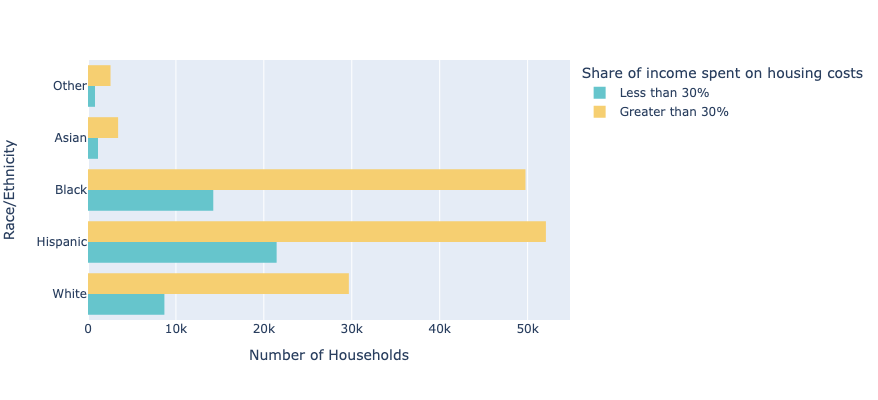

In [103]:
fig = px.histogram(df2, 
                   x="Number of Households", 
                   y="Race/Ethnicity",
                   color='Share of income spent on housing costs', 
                   barmode='group',
                   color_discrete_sequence=px.colors.qualitative.Pastel,
                   height=400)

fig.update_yaxes(title="Race/Ethnicity")
fig.update_xaxes(title="Number of Households")
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("sum of ", "")))

fig.show()

In [117]:
fig.write_html("race.html")

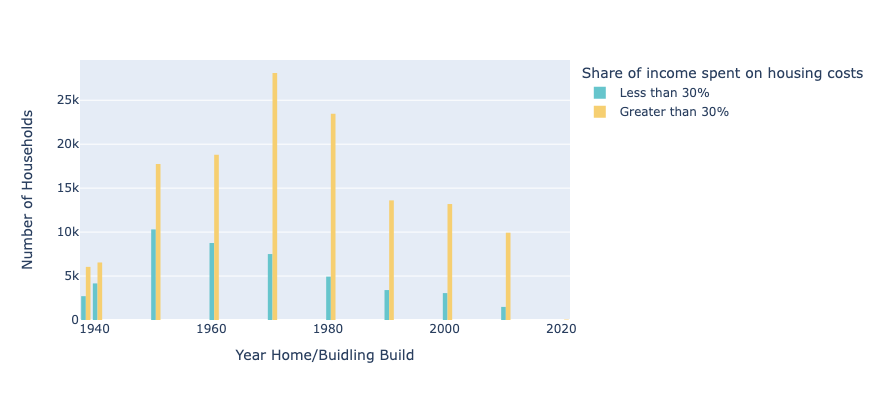

In [120]:
fig = px.histogram(df2, 
                   x="YRBLT", 
                   y="Number of Households",
                   color='Share of income spent on housing costs', 
                   barmode='group',
                   color_discrete_sequence=px.colors.qualitative.Pastel,
                   height=400)

fig.update_yaxes(title="Number of Households")
fig.update_xaxes(title="Year Home/Buidling Build")
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("sum of ", "")))

fig.show()

In [121]:
fig.write_html("yearbuilt.html")

In [ ]:
#renamed / cleaned varables to display
df2['MV'] = df2['MV'].replace({1:'12 months or less'})
df2['MV'] = df2['MV'].replace({2:'13 to 23 months'})
df2['MV'] = df2['MV'].replace({3:'2 to 4 years'})
df2['MV'] = df2['MV'].replace({4:'5 to 9 years'})
df2['MV'] = df2['MV'].replace({5:'10 to 19 years'})
df2['MV'] = df2['MV'].replace({6:'20 to 29 years'})
df2['MV'] = df2['MV'].replace({7:'30 years or more'})

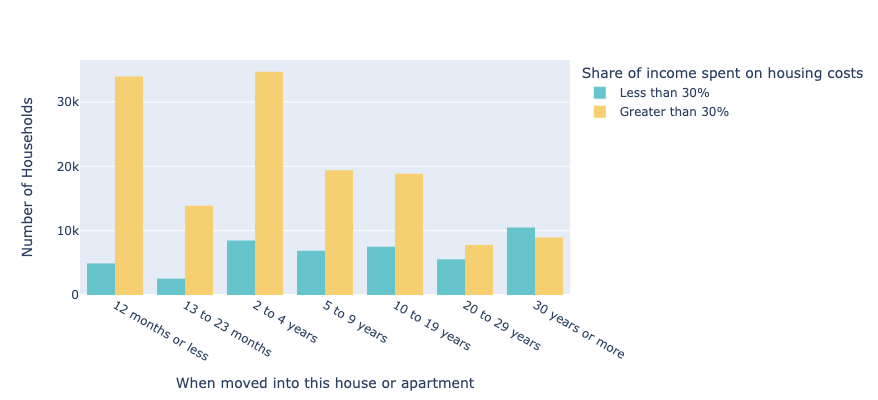

In [122]:
fig = px.histogram(df2, 
                   x="MV", 
                   y="Number of Households",
                   color='Share of income spent on housing costs', 
                   barmode='group',
                   color_discrete_sequence=px.colors.qualitative.Pastel,
                   category_orders={'MV': ['12 months or less','13 to 23 months', '2 to 4 years','5 to 9 years','10 to 19 years','20 to 29 years','30 years or more']},
                   height=400)

fig.update_yaxes(title="Number of Households")
fig.update_xaxes(title="When moved into this house or apartment")
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("sum of ", "")))

fig.show()

In [123]:
fig.write_html("MV.html")

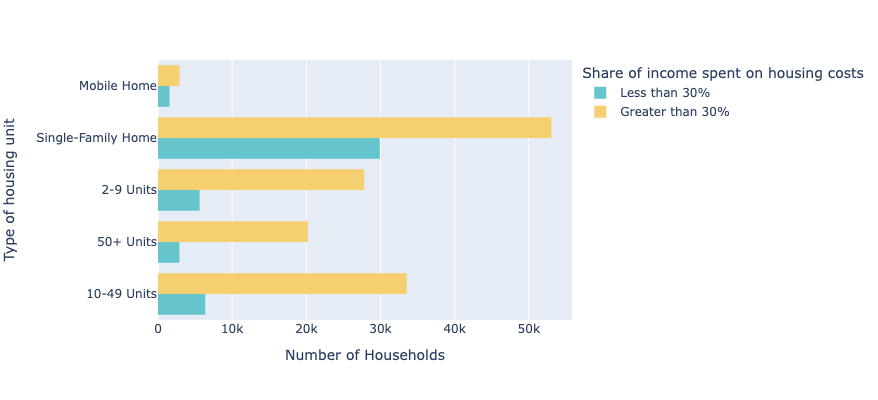

In [111]:
fig = px.histogram(df2, 
                   x="Number of Households", 
                   y="typology",
                   color='Share of income spent on housing costs', 
                   barmode='group',
                   color_discrete_sequence=px.colors.qualitative.Pastel,
                   height=400)

fig.update_yaxes(title="Type of housing unit")
fig.update_xaxes(title="Number of Households")
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("sum of ", "")))

fig.show()

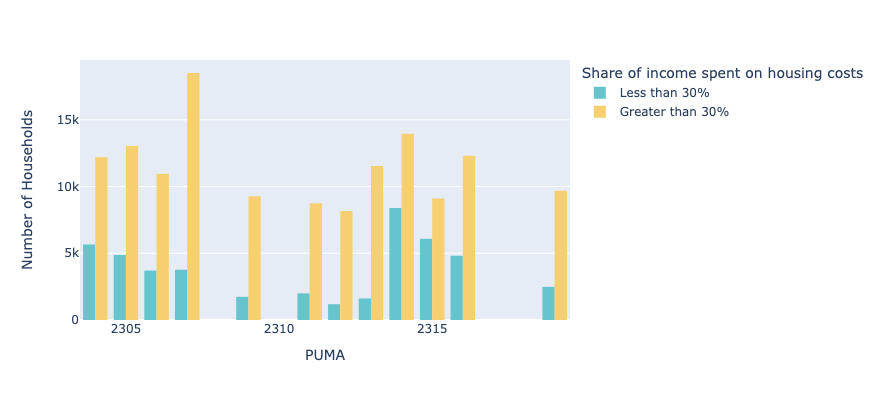

In [118]:
fig = px.histogram(df2, 
                   x="PUMA", 
                   y="Number of Households",
                   color='Share of income spent on housing costs', 
                   barmode='group',
                   color_discrete_sequence=px.colors.qualitative.Pastel,
                   height=400)

fig.update_yaxes(title="Number of Households")
fig.update_xaxes(title="PUMA")
fig.for_each_trace(lambda t: t.update(hovertemplate=t.hovertemplate.replace("sum of ", "")))

fig.show()

In [119]:
fig.write_html("PUMA.html")